## Data import and exploration

For this example, I am using the wine classification dataset from scikit-learn to perform the classification task. The dataset serves as a good toy set example to evaluate the clustering algorithms on 3+ classes

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler    # To apply z-score normalization on the dataset
import numpy as np
import pandas as pd

# Load the dataset
data, labels = load_wine(return_X_y=True)

wine_dataset = load_wine()                          # Return a bunch object that has the attributes - data, target, feature names and target names
data, labels = wine_dataset.data, wine_dataset.target
(num_sample, num_feature) = data.shape
num_label = np.unique(labels).size
feature_names = wine_dataset.feature_names

feature_df = pd.DataFrame(data,columns=feature_names)
label_df = pd.DataFrame(labels, columns=['class'])

print(f"There are {num_sample} samples, each having {num_feature} feature(s) and belong to one of {num_label} types")


There are 178 samples, each having 13 feature(s) and belong to one of 3 types


### Explore some samples in the dataset

In [ ]:
feature_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


## Data Processing

In [ ]:
# Check if there is any missing value in the dataset
print("Missing values in any column of the dataset? \n")
print(pd.isnull(feature_df).any())

Missing values in any column of the dataset? 

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool


In the code block below, I am applying a z-score normalizer on the feature dataframe

In [22]:
scaler = StandardScaler()
feature_df_normalized = pd.DataFrame(scaler.fit_transform(feature_df),columns=feature_names)
feature_df_normalized.head(10)
# feature_df_normalized.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [9]:
2 //3 

0

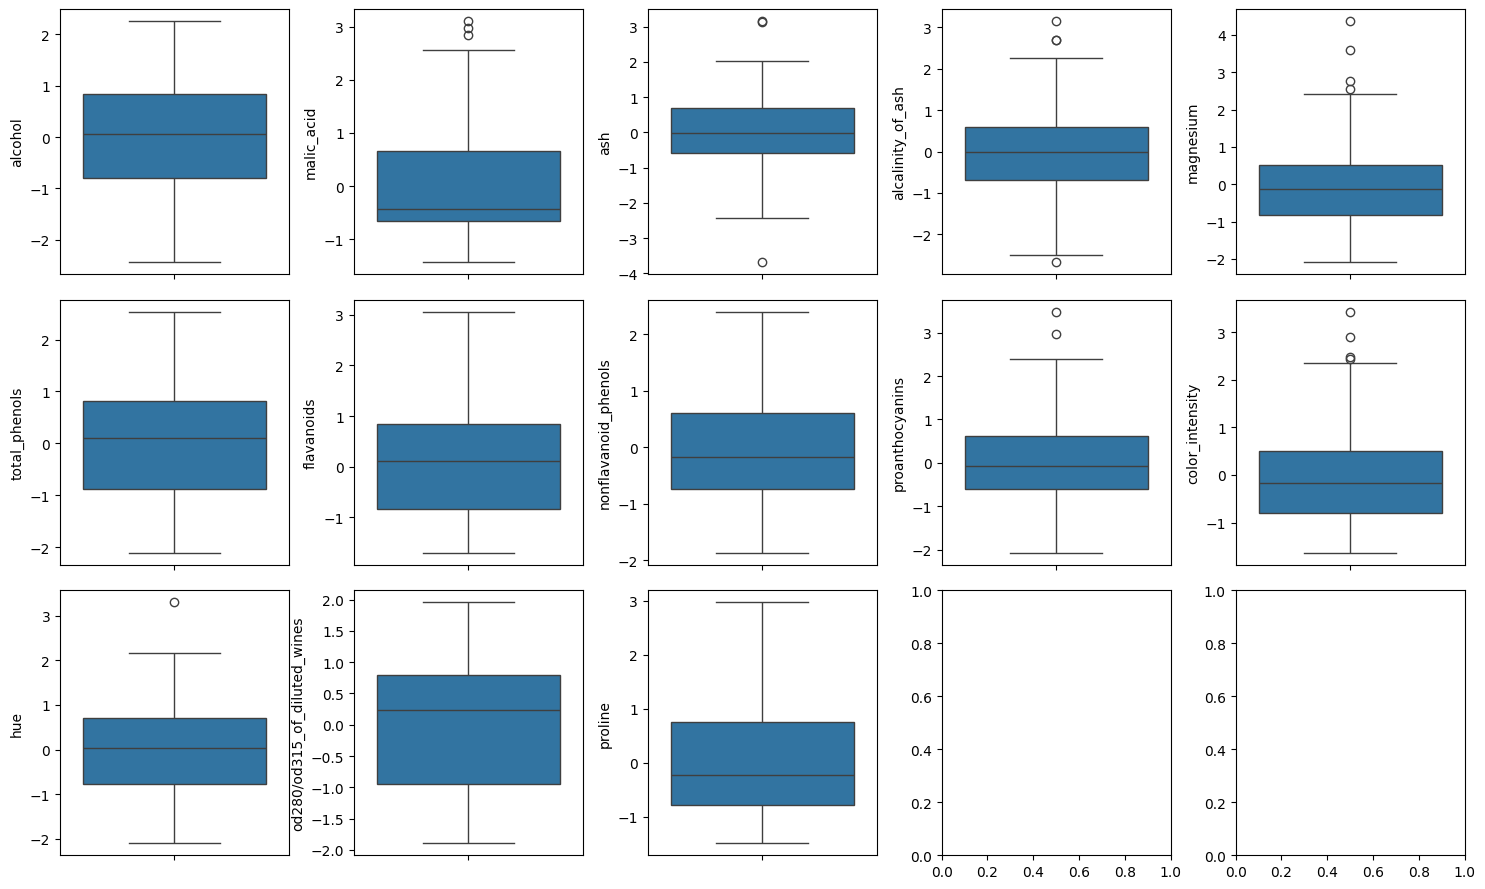

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,5,figsize = (15,9))

for idx, feature in enumerate(feature_names):
    sns.boxplot(data=feature_df_normalized[feature],ax = axes[idx // 5, idx % 5])

plt.tight_layout()
plt.show()

In [24]:
# Create a boolean mask for rows where any absolute feature value is greater than 3
mask = (feature_df_normalized.abs() <= 3).all(axis=1)

# Filter the dataset using the mask
feature_df_normalized_filtered = feature_df_normalized[mask]

# Display the first 10 rows of the filtered dataset
feature_df_normalized_filtered


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


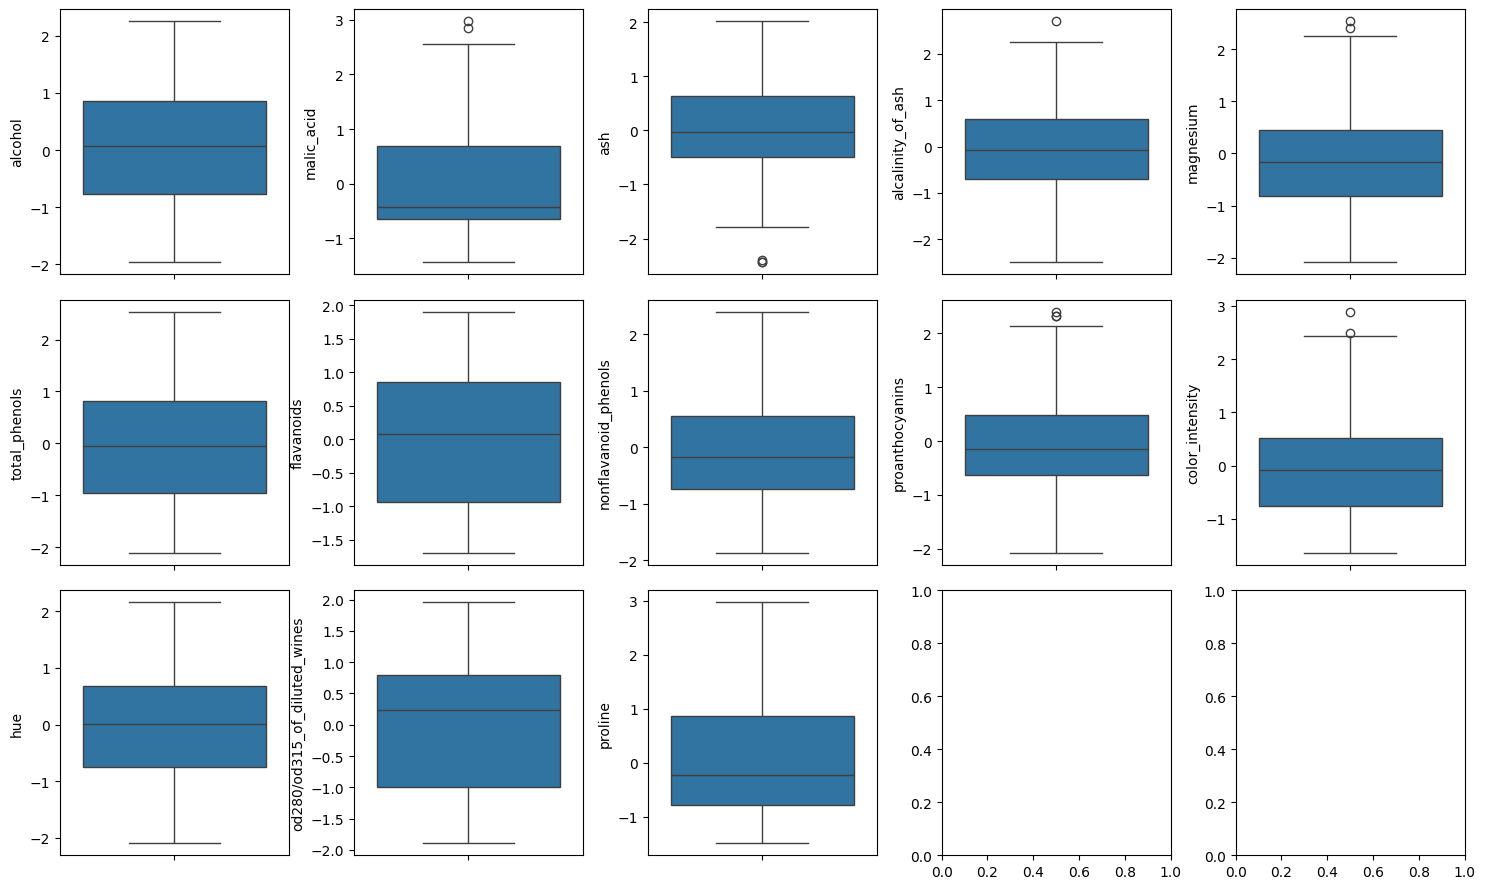

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,5,figsize = (15,9))

for idx, feature in enumerate(feature_names):
    sns.boxplot(data=feature_df_normalized_filtered[feature],ax = axes[idx // 5, idx % 5])

plt.tight_layout()
plt.show()

## KMeans Clustering

### Parameter Experiment

In this section, I will investigate the performance of KMeans Clustering on the dataset of choice. The following parameters in KMeans clustering are investigated

* **n_cluster** - The number of cluster that KMeans Clustering will try to fit
* **init** - Initialization method and can be etiher based on probability distribution in the data (k_means++) or at random
* **n_init** - The number of time that the initialization step is done to enhance the chance of good initial conditions
* **max_iter** - The number of time KMeans is run in an episode

The cosine distance was chosen as the silhouette score metric to match with the top performers in the Agglomerative Clustering experiment (later section)

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time 

# Set up parameter grid for KMean experiment
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7],         # Number of clusters
    'init': ['k-means++', 'random'],    # Initialization method
    'n_init': [5, 10, 15, 20],                 # Number of initializations
    'max_iter': [10, 25, 50, 100, 200, 300],             # Maximum iterations
}

# Store results
results_kmeans = []

# Iterate through each combination of parameter in the grid and perform KMean Clustering
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for n_init in param_grid['n_init']:
            for max_iter in param_grid['max_iter']:
                # Record the start time
                start_time = time.time()

                # Initialize the KMeans object with the current parameters
                kmeans = KMeans(
                    n_clusters=n_clusters,
                    init=init,
                    n_init=n_init,
                    max_iter=max_iter,
                    random_state=42  # for reproducibility
                )
                
                # Fit the model to the normalized data
                kmeans.fit(feature_df_normalized_filtered)

                # Record the end time
                end_time = time.time()
                
                # Calculate elapsed time
                elapsed_time = end_time - start_time

                # Evaluate the model using silhouette and Davies-Bouldin score (measuring how well the clustering was done)
                silhouette_avg = silhouette_score(feature_df_normalized_filtered, kmeans.labels_, metric = 'cosine')
                davies_bouldin = davies_bouldin_score(feature_df_normalized_filtered, kmeans.labels_)
                
                # Store the results
                results_kmeans.append({
                    'n_clusters': n_clusters,
                    'init': init,
                    'n_init': n_init,
                    'max_iter': max_iter,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_score': davies_bouldin,
                    'run_time': elapsed_time
                })

In [27]:
# Convert the results to a DataFrame for easy analysis
results_kmeans_df = pd.DataFrame(results_kmeans)

# Print out the top results with the highest silhouette score
num_top_results = 9
top_results_kmeans = results_kmeans_df.sort_values(by='silhouette_score', ascending=False).head(num_top_results)

print(f"The silhouette score of the top {num_top_results} results")
top_results_kmeans

The silhouette score of the top 9 results


,n_clusters,init,n_init,max_iter,silhouette_score,davies_bouldin_score,run_time
95,3,random,20,300,0.496489,1.28578,0.112300
94,3,random,20,200,0.496489,1.28578,0.113428
93,3,random,20,100,0.496489,1.28578,0.111265
92,3,random,20,50,0.496489,1.28578,0.114280
91,3,random,20,25,0.496489,1.28578,0.118815
90,3,random,20,10,0.496489,1.28578,0.117573
89,3,random,15,300,0.496489,1.28578,0.086821
88,3,random,15,200,0.496489,1.28578,0.086069
87,3,random,15,100,0.496489,1.28578,0.082029


### Effect of each parameters on the performance

#### Number of clusters

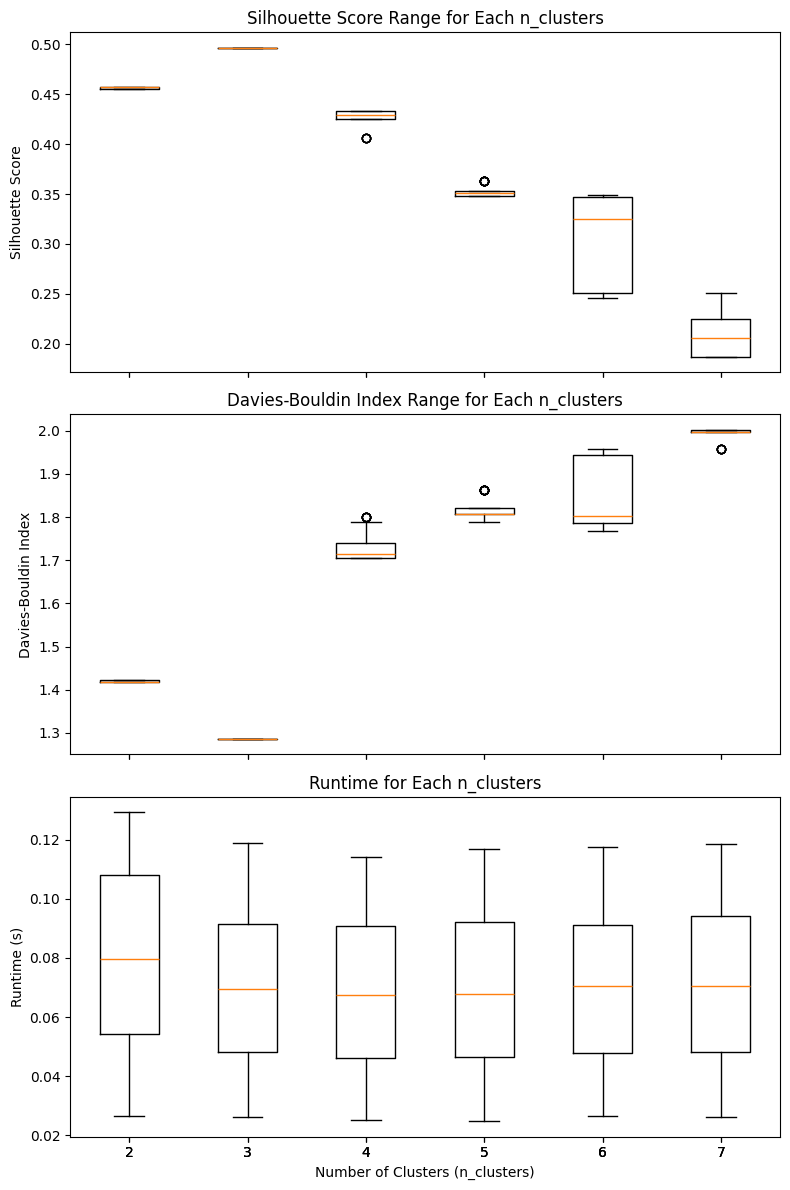

In [ ]:
# Prepare data for silhouette scores: group by n_clusters
silhouette_data_to_plot = [results_kmeans_df[results_kmeans_df['n_clusters'] == n_cluster]['silhouette_score'].values 
                           for n_cluster in sorted(results_kmeans_df['n_clusters'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_kmeans_df[results_kmeans_df['n_clusters'] == n_cluster]['davies_bouldin_score'].values 
                   for n_cluster in sorted(results_kmeans_df['n_clusters'].unique())]

# Prepare data for run time performance
runtime_data_to_plot = [results_kmeans_df[results_kmeans_df['n_clusters'] == n_cluster]['run_time'].values 
                   for n_cluster in sorted(results_kmeans_df['n_clusters'].unique())]


# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, positions=sorted(results_kmeans_df['n_clusters'].unique()))
axes[0].set_title("Silhouette Score Range for Each n_clusters")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, positions=sorted(results_kmeans_df['n_clusters'].unique()))
axes[1].set_title("Davies-Bouldin Index Range for Each n_clusters")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for runtime performance
axes[2].boxplot(runtime_data_to_plot, positions=sorted(results_kmeans_df['n_clusters'].unique()))
axes[2].set_title("Runtime for Each n_clusters")
axes[2].set_xlabel("Number of Clusters (n_clusters)")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()

#### Intialization method

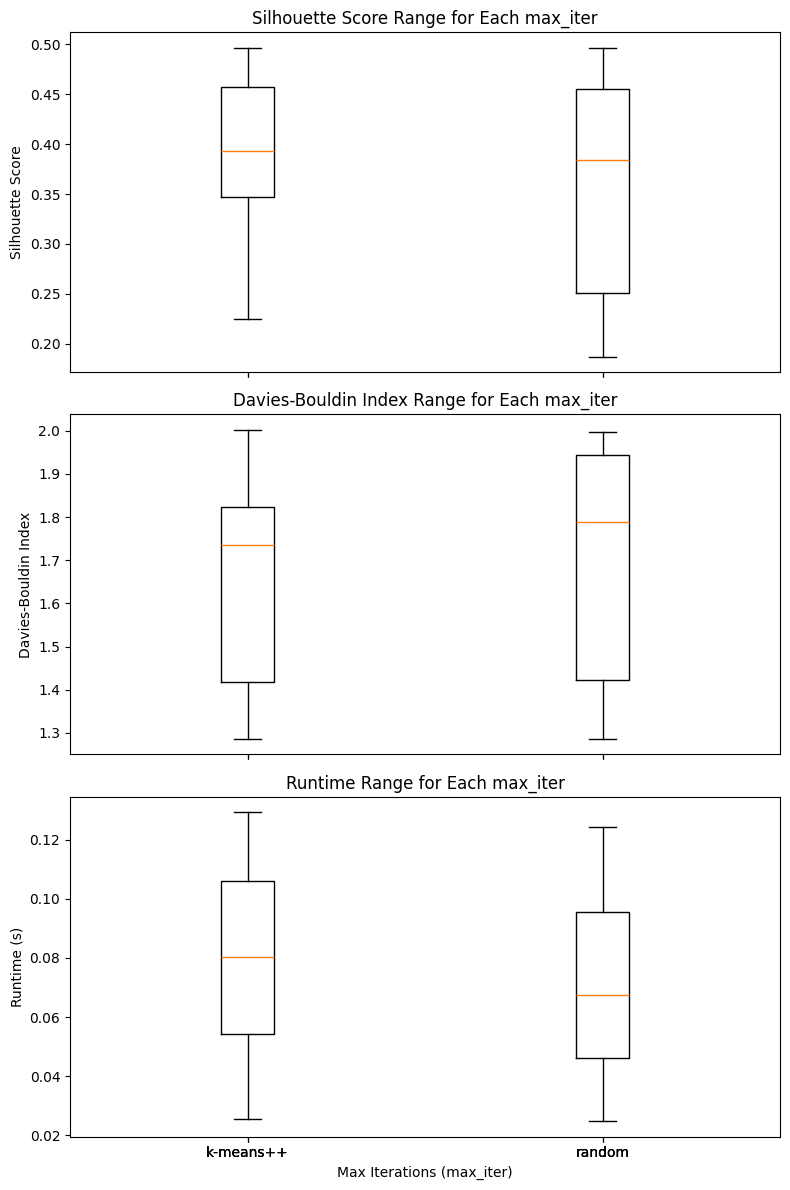

In [52]:
# Prepare data for silhouette scores: group by max_iter
silhouette_data_to_plot = [results_kmeans_df[results_kmeans_df['init'] == init]['silhouette_score'].values 
                           for init in sorted(results_kmeans_df['init'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_kmeans_df[results_kmeans_df['init'] == init]['davies_bouldin_score'].values 
                   for init in sorted(results_kmeans_df['init'].unique())]

# Prepare data for runtime performance
runtime_data_to_plot = [results_kmeans_df[results_kmeans_df['init'] == init]['run_time'].values 
                   for init in sorted(results_kmeans_df['init'].unique())]

# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, tick_labels=sorted(results_kmeans_df['init'].unique()))
axes[0].set_title("Silhouette Score Range for Each max_iter")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, tick_labels=sorted(results_kmeans_df['init'].unique()))
axes[1].set_title("Davies-Bouldin Index Range for Each max_iter")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for Davies-Bouldin scores
axes[2].boxplot(runtime_data_to_plot, tick_labels=sorted(results_kmeans_df['init'].unique()))
axes[2].set_title("Runtime Range for Each max_iter")
axes[2].set_xlabel("Max Iterations (max_iter)")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()


#### Number of initialization

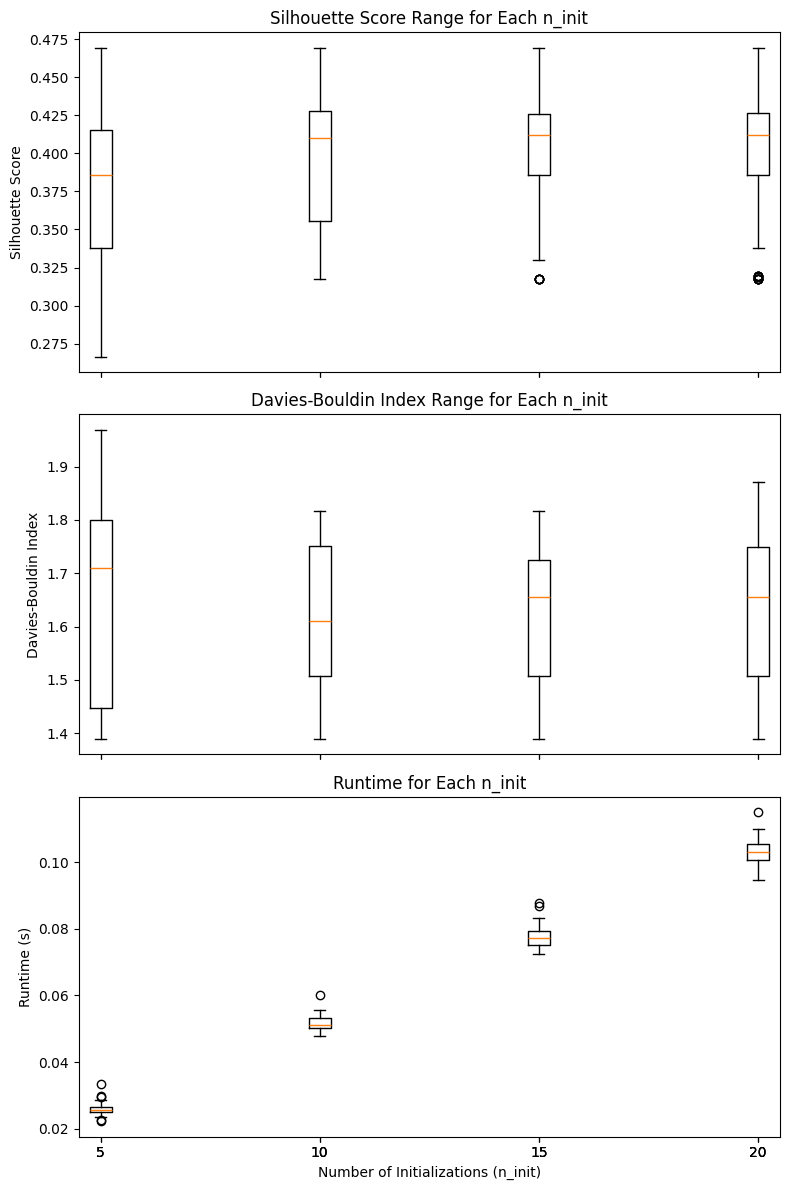

In [ ]:
# Prepare data for silhouette scores: group by n_init
silhouette_data_to_plot = [results_kmeans_df[results_kmeans_df['n_init'] == n_init]['silhouette_score'].values 
                           for n_init in sorted(results_kmeans_df['n_init'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_kmeans_df[results_kmeans_df['n_init'] == n_init]['davies_bouldin_score'].values 
                   for n_init in sorted(results_kmeans_df['n_init'].unique())]

# Prepare data for runtime performance
runtime_data_to_plot = [results_kmeans_df[results_kmeans_df['n_init'] == n_init]['run_time'].values 
                   for n_init in sorted(results_kmeans_df['n_init'].unique())]

# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, positions=sorted(results_kmeans_df['n_init'].unique()))
axes[0].set_title("Silhouette Score Range for Each n_init")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, positions=sorted(results_kmeans_df['n_init'].unique()))
axes[1].set_title("Davies-Bouldin Index Range for Each n_init")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for runtime performance
axes[2].boxplot(runtime_data_to_plot, positions=sorted(results_kmeans_df['n_init'].unique()))
axes[2].set_title("Runtime for Each n_init")
axes[2].set_xlabel("Number of Initializations (n_init)")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()


#### Maximum iterations

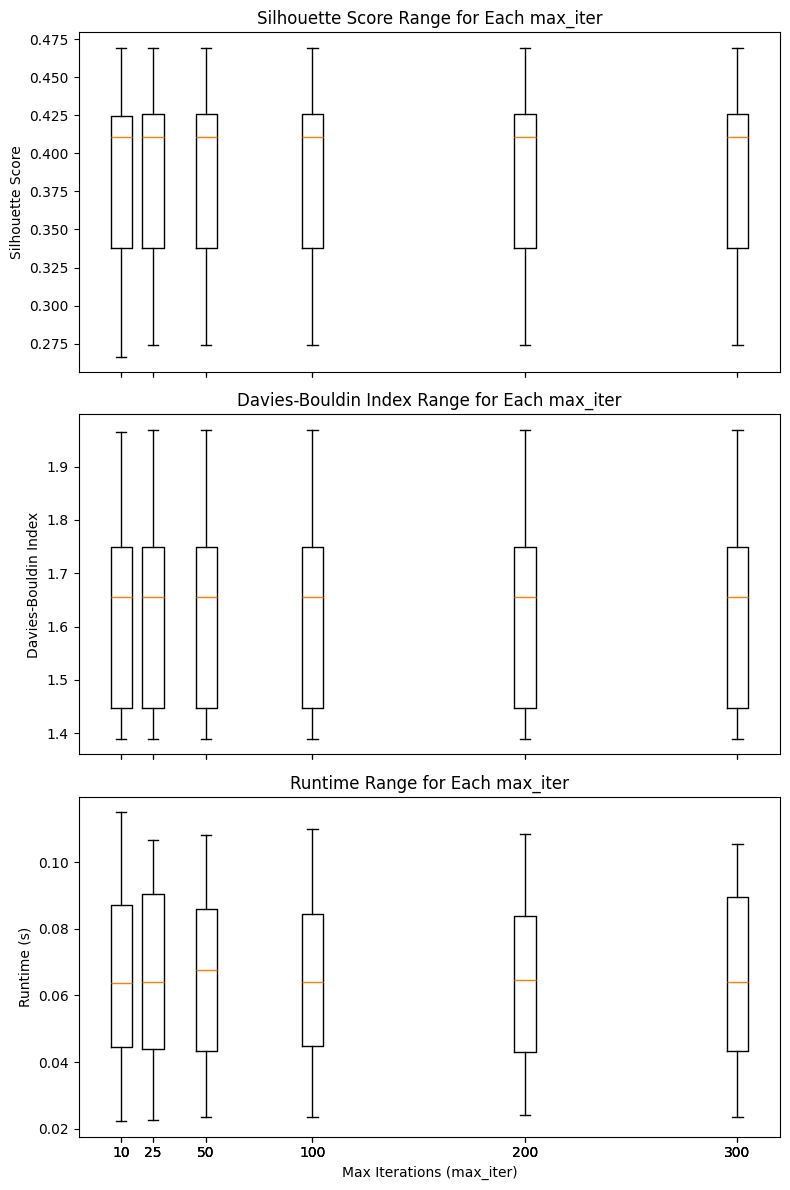

In [ ]:
# Prepare data for silhouette scores: group by max_iter
silhouette_data_to_plot = [results_kmeans_df[results_kmeans_df['max_iter'] == max_iter]['silhouette_score'].values 
                           for max_iter in sorted(results_kmeans_df['max_iter'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_kmeans_df[results_kmeans_df['max_iter'] == max_iter]['davies_bouldin_score'].values 
                   for max_iter in sorted(results_kmeans_df['max_iter'].unique())]

# Prepare data for runtime performance
runtime_data_to_plot = [results_kmeans_df[results_kmeans_df['max_iter'] == max_iter]['run_time'].values 
                   for max_iter in sorted(results_kmeans_df['max_iter'].unique())]

# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, positions=sorted(results_kmeans_df['max_iter'].unique()), widths=10)
axes[0].set_title("Silhouette Score Range for Each max_iter")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, positions=sorted(results_kmeans_df['max_iter'].unique()), widths=10)
axes[1].set_title("Davies-Bouldin Index Range for Each max_iter")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for Davies-Bouldin scores
axes[2].boxplot(runtime_data_to_plot, positions=sorted(results_kmeans_df['max_iter'].unique()), widths=10)
axes[2].set_title("Runtime Range for Each max_iter")
axes[2].set_xlabel("Max Iterations (max_iter)")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()


### Visualization of top results

The following block visualize the clustering performance of the best KMeans parameter configurations

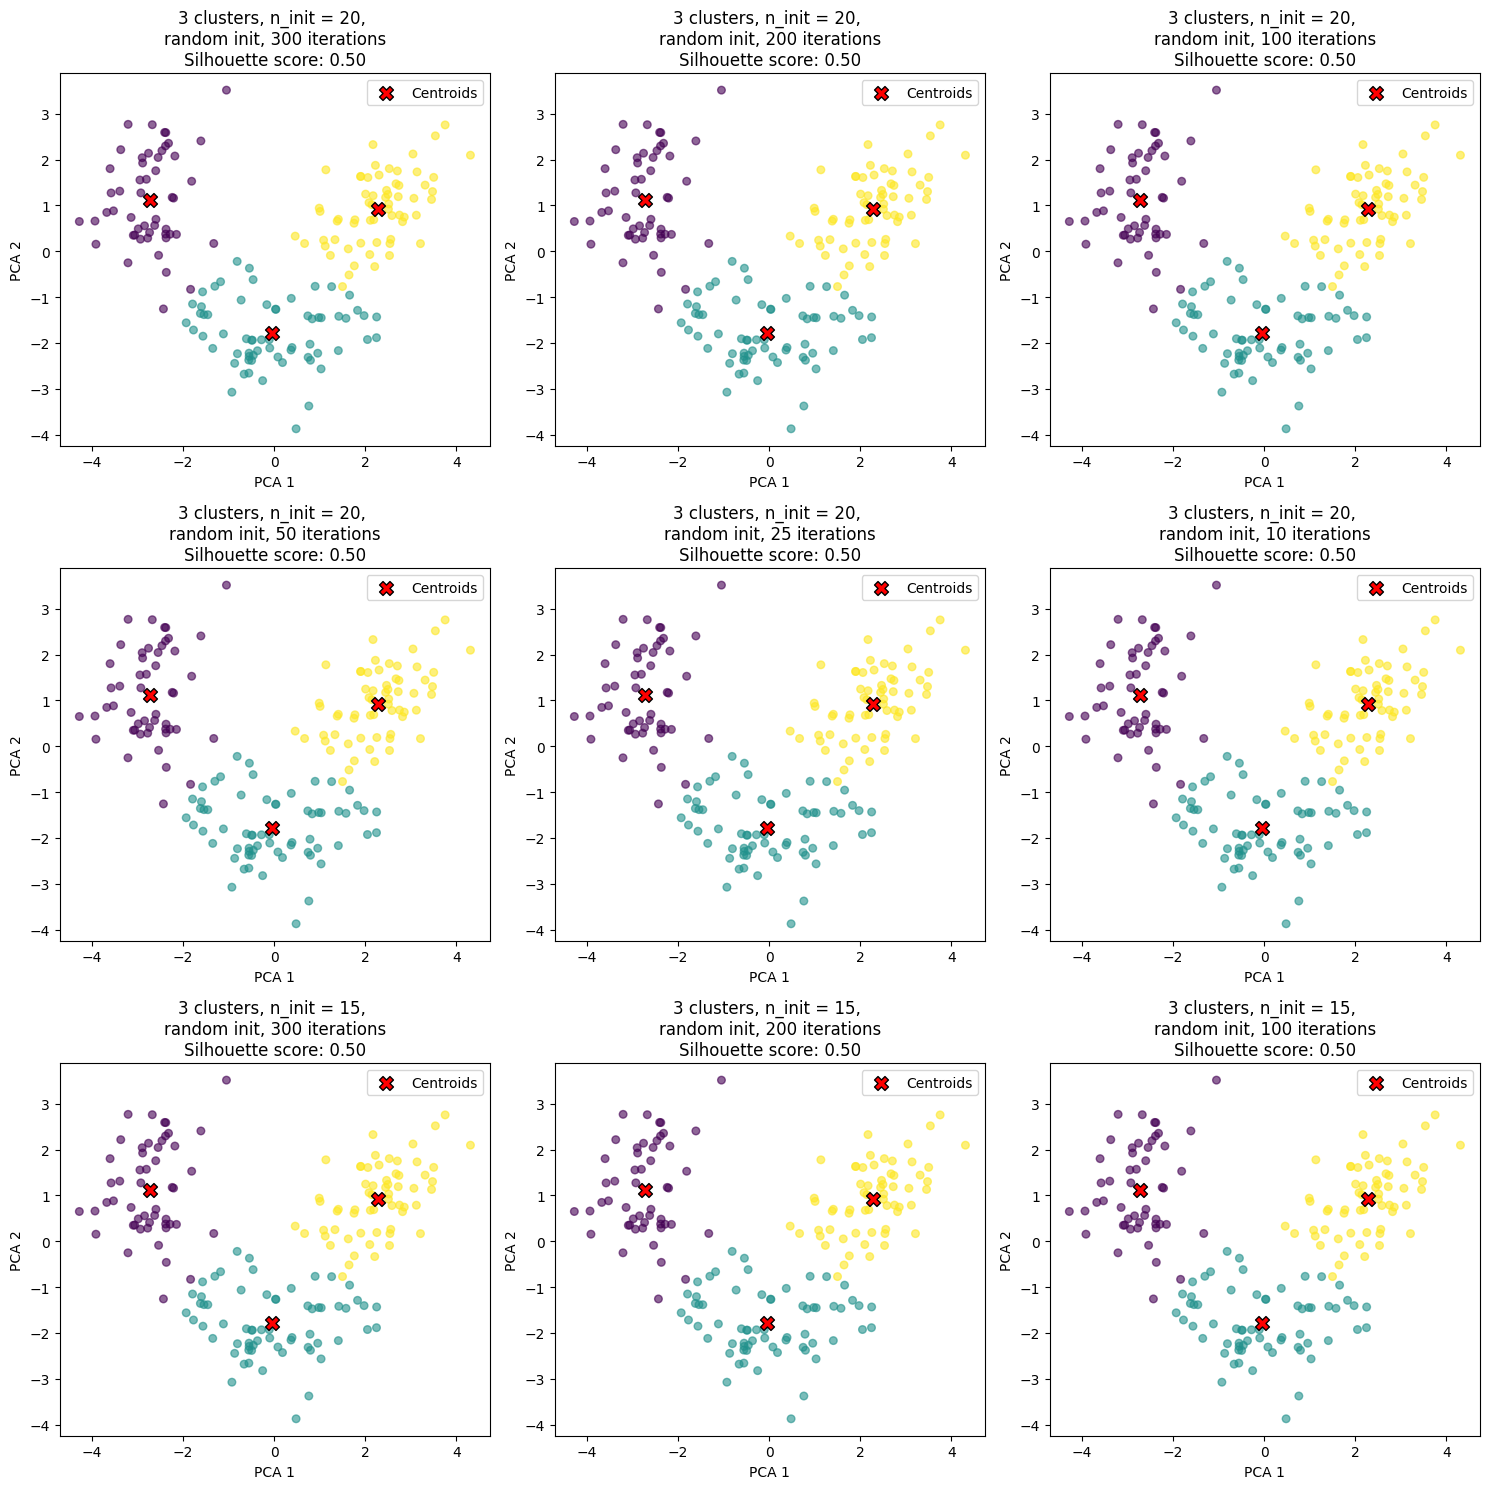

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Set up a plotting grid
num_rows = 3
num_cols = int(num_top_results / num_rows) + (num_top_results % num_rows > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# For each of the top combinations, perform KMeans and visualize
for i, param_set in enumerate(top_results_kmeans.itertuples()):
    row = i // num_cols
    col = i % num_cols
    
    # Extract the parameters for the KMeans model
    kmeans = KMeans(
        n_clusters=param_set.n_clusters,
        init=param_set.init,
        n_init=param_set.n_init,
        max_iter=param_set.max_iter,
        random_state=42
    )
    
    # Fit the KMeans model
    kmeans.fit(feature_df_normalized)
    
    # Reduce the dimensions of the data to 2D using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(feature_df_normalized)
    
    # Transform the cluster centers to 2D space using the same PCA object
    centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
    reduced_centroids = pca.transform(centroid_df)
    
    # Plot the clusters
    scatter = axes[row, col].scatter(
        reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=30, alpha=0.6
    )
    
    # Plot the centroids in reduced space
    axes[row, col].scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], marker='X', color='red', s=100, edgecolor = 'black', label='Centroids')
    
    axes[row, col].set_title(
        f"{param_set.n_clusters} clusters, "
        f"n_init = {param_set.n_init}, \n"
        f"{param_set.init} init, {param_set.max_iter} iterations\n"
        f"Silhouette score: {param_set.silhouette_score:.2f}"
    )
    axes[row, col].set_xlabel('PCA 1')
    axes[row, col].set_ylabel('PCA 2')
    axes[row, col].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Agglomerative Clustering

### Parameter Experiment

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph

import pandas as pd
import numpy as np

# Parameter grid for Agglomerative Clustering
knn_graph = kneighbors_graph(feature_df_normalized_filtered, n_neighbors=30, include_self=False)

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8],            # Number of clusters
    'metric': ['euclidean', 'manhattan','cosine','l1','l2'], # Distance metric
    'linkage': ['ward', 'complete', 'average', 'single'], # Linkage criteria
    'compute_full_tree': [True, False],    # Whether to compute the full tree
    'connectivity': [None, knn_graph],               # Connectivity graph
}

# Store results
results_agglo = []

# Iterate through parameter combinations
for n_clusters in param_grid['n_clusters']:
    for metric in param_grid['metric']:
        for linkage in param_grid['linkage']:
            for compute_full_tree in param_grid['compute_full_tree']:
                for connectivity in param_grid['connectivity']:
                    try:
                        # Avoid invalid combinations: 'ward' linkage requires 'euclidean' metric
                        if linkage == 'ward' and metric != 'euclidean':
                            continue

                        # Record the start time
                        start_time = time.time()

                        # Initialize Agglomerative Clustering with current parameters
                        model = AgglomerativeClustering(
                            n_clusters=n_clusters,
                            metric=metric,
                            linkage=linkage,
                            compute_full_tree=compute_full_tree,
                            connectivity=connectivity
                        )

                        # Fit the model and compute labels
                        labels = model.fit_predict(feature_df_normalized_filtered)

                        # Record the end time
                        end_time = time.time()
                        
                        # Calculate elapsed time
                        elapsed_time = end_time - start_time

                        # Evaluate clustering using silhouette score
                        silhouette_avg = silhouette_score(feature_df_normalized_filtered, labels, metric=metric)
                        davies_bouldin = davies_bouldin_score(feature_df_normalized_filtered, labels)
                        

                        # Store the results
                        results_agglo.append({
                            'n_clusters': n_clusters,
                            'metric': metric,
                            'linkage': linkage,
                            'compute_full_tree': compute_full_tree,
                            'connectivity': connectivity,
                            'connectivity_type': 'KNN' if connectivity is not None else 'None',
                            'silhouette_score': silhouette_avg,
                            'davies_bouldin_score': davies_bouldin,
                            'run_time': elapsed_time
                        })
                    except Exception as e:
                        print(f"Error for parameters: n_clusters={n_clusters}, metric={metric}, linkage={linkage}")
                        print(f"Exception: {e}")


In [37]:
# Convert the results to a DataFrame for easy analysis
results_agglo_df = pd.DataFrame(results_agglo)

# Print out the top results with the highest silhouette score
num_top_results = 9
top_results_agglo = results_agglo_df.sort_values(by='silhouette_score', ascending=False).head(num_top_results)

print(f"The silhouette score of the top {num_top_results} results")
top_results_agglo.drop('connectivity',axis=1,inplace=False)                 # Hide the KNN connectivity objects 

The silhouette score of the top 9 results


,n_clusters,metric,linkage,compute_full_tree,connectivity_type,silhouette_score,davies_bouldin_score,run_time
98,3,cosine,average,False,None,0.494310,1.289960,0.000000
96,3,cosine,average,True,None,0.494310,1.289960,0.000996
92,3,cosine,complete,True,None,0.493113,1.291607,0.000000
94,3,cosine,complete,False,None,0.493113,1.291607,0.001122
162,4,cosine,average,False,None,0.436947,1.467452,0.000000
160,4,cosine,average,True,None,0.436947,1.467452,0.000000
34,2,cosine,average,False,None,0.431567,1.366293,0.000000
32,2,cosine,average,True,None,0.431567,1.366293,0.000000
28,2,cosine,complete,True,None,0.424747,1.356943,0.000000


### Efffect of Each Parameter

#### Number of Clusters

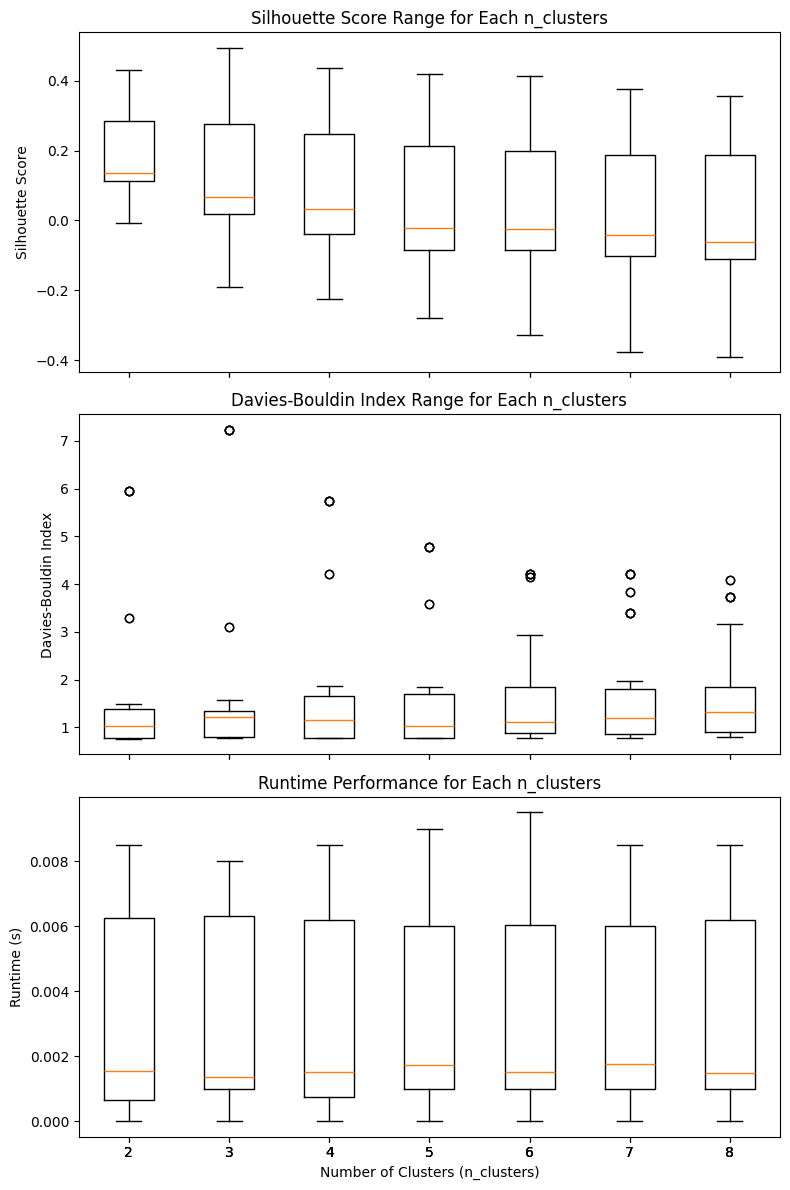

In [ ]:
# Prepare data for silhouette scores: group by n_clusters
silhouette_data_to_plot = [results_agglo_df[results_agglo_df['n_clusters'] == n_cluster]['silhouette_score'].values 
                           for n_cluster in sorted(results_agglo_df['n_clusters'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_agglo_df[results_agglo_df['n_clusters'] == n_cluster]['davies_bouldin_score'].values 
                   for n_cluster in sorted(results_agglo_df['n_clusters'].unique())]

# Prepare data for runtime performance
runtime_data_to_plot = [results_agglo_df[results_agglo_df['n_clusters'] == n_cluster]['run_time'].values 
                   for n_cluster in sorted(results_agglo_df['n_clusters'].unique())]

# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, positions=sorted(results_agglo_df['n_clusters'].unique()), widths=0.5)
axes[0].set_title("Silhouette Score Range for Each n_clusters")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, positions=sorted(results_agglo_df['n_clusters'].unique()), widths=0.5)
axes[1].set_title("Davies-Bouldin Index Range for Each n_clusters")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for runtime performance
axes[2].boxplot(runtime_data_to_plot, positions=sorted(results_agglo_df['n_clusters'].unique()), widths=0.5)
axes[2].set_title("Runtime Range for Each n_clusters")
axes[2].set_xlabel("Number of Clusters (n_clusters)")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()

#### Type of linkage

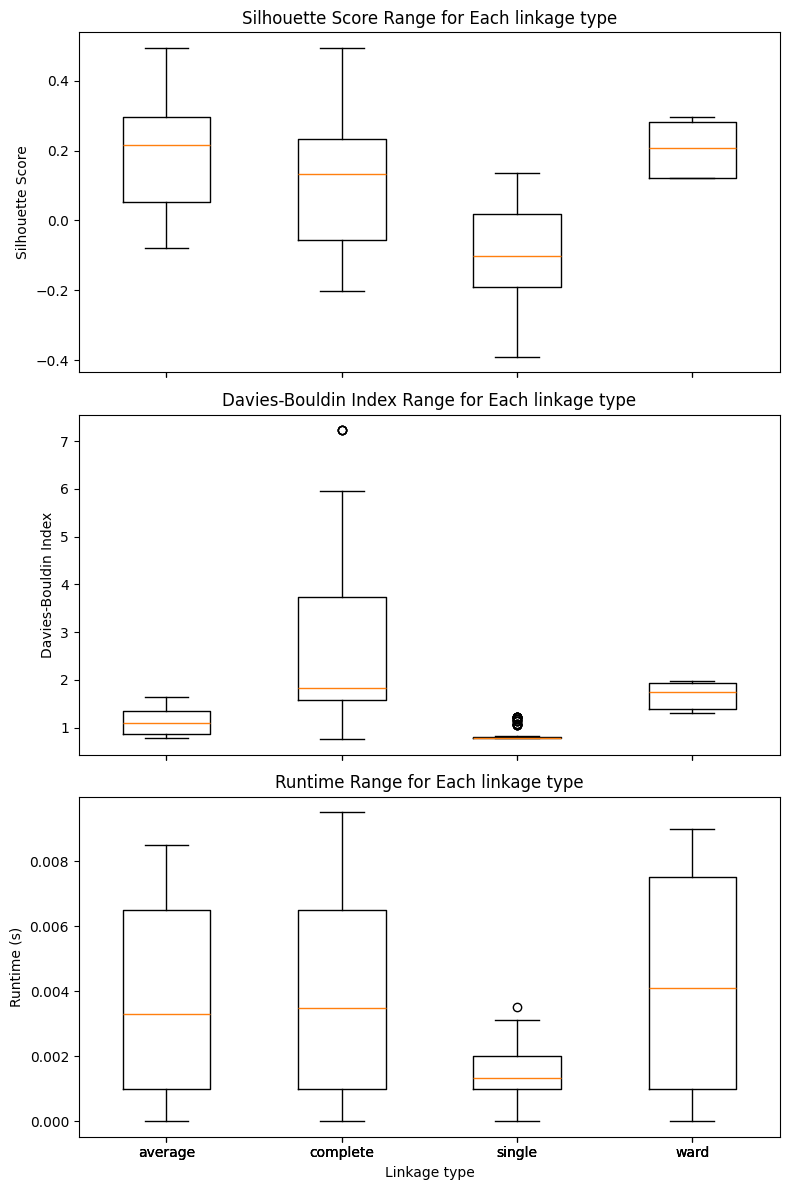

In [45]:
# Prepare data for silhouette scores: group by n_clusters
silhouette_data_to_plot = [results_agglo_df[results_agglo_df['linkage'] == linkage]['silhouette_score'].values 
                           for linkage in sorted(results_agglo_df['linkage'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_agglo_df[results_agglo_df['linkage'] == linkage]['davies_bouldin_score'].values 
                   for linkage in sorted(results_agglo_df['linkage'].unique())]

# Prepare data for runtime performance
runtime_data_to_plot = [results_agglo_df[results_agglo_df['linkage'] == linkage]['run_time'].values 
                   for linkage in sorted(results_agglo_df['linkage'].unique())]

# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, tick_labels=sorted(results_agglo_df['linkage'].unique()), widths=0.5)
axes[0].set_title("Silhouette Score Range for Each linkage type")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, tick_labels=sorted(results_agglo_df['linkage'].unique()), widths=0.5)
axes[1].set_title("Davies-Bouldin Index Range for Each linkage type")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for time performance
axes[2].boxplot(runtime_data_to_plot, tick_labels=sorted(results_agglo_df['linkage'].unique()), widths=0.5)
axes[2].set_title("Runtime Range for Each linkage type")
axes[2].set_xlabel("Linkage type")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()

#### Affinity metrics

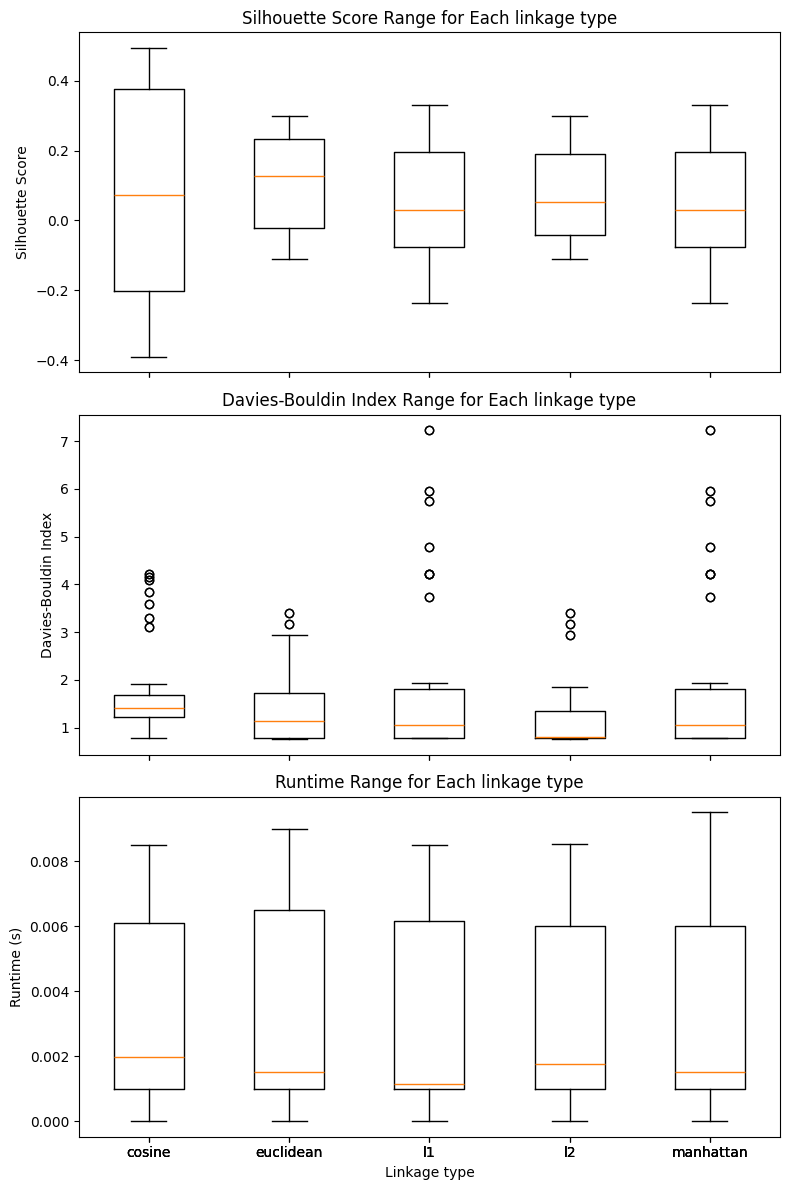

In [47]:
# Prepare data for silhouette scores: group by metrics
silhouette_data_to_plot = [results_agglo_df[results_agglo_df['metric'] == metric]['silhouette_score'].values 
                           for metric in sorted(results_agglo_df['metric'].unique())]

# Prepare data for Davies-Bouldin scores
db_data_to_plot = [results_agglo_df[results_agglo_df['metric'] == metric]['davies_bouldin_score'].values 
                   for metric in sorted(results_agglo_df['metric'].unique())]

# Prepare data for runtime performance
runtime_data_to_plot = [results_agglo_df[results_agglo_df['metric'] == metric]['run_time'].values 
                   for metric in sorted(results_agglo_df['metric'].unique())]

# Create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Box plot for silhouette scores
axes[0].boxplot(silhouette_data_to_plot, tick_labels=sorted(results_agglo_df['metric'].unique()), widths=0.5)
axes[0].set_title("Silhouette Score Range for Each linkage type")
axes[0].set_ylabel("Silhouette Score")

# Box plot for Davies-Bouldin scores
axes[1].boxplot(db_data_to_plot, tick_labels=sorted(results_agglo_df['metric'].unique()), widths=0.5)
axes[1].set_title("Davies-Bouldin Index Range for Each linkage type")
axes[1].set_ylabel("Davies-Bouldin Index")

# Box plot for time performance
axes[2].boxplot(runtime_data_to_plot, tick_labels=sorted(results_agglo_df['metric'].unique()), widths=0.5)
axes[2].set_title("Runtime Range for Each linkage type")
axes[2].set_xlabel("Linkage type")
axes[2].set_ylabel("Runtime (s)")

# Adjust layout
plt.tight_layout()
plt.show()

### Visulization of Top Results

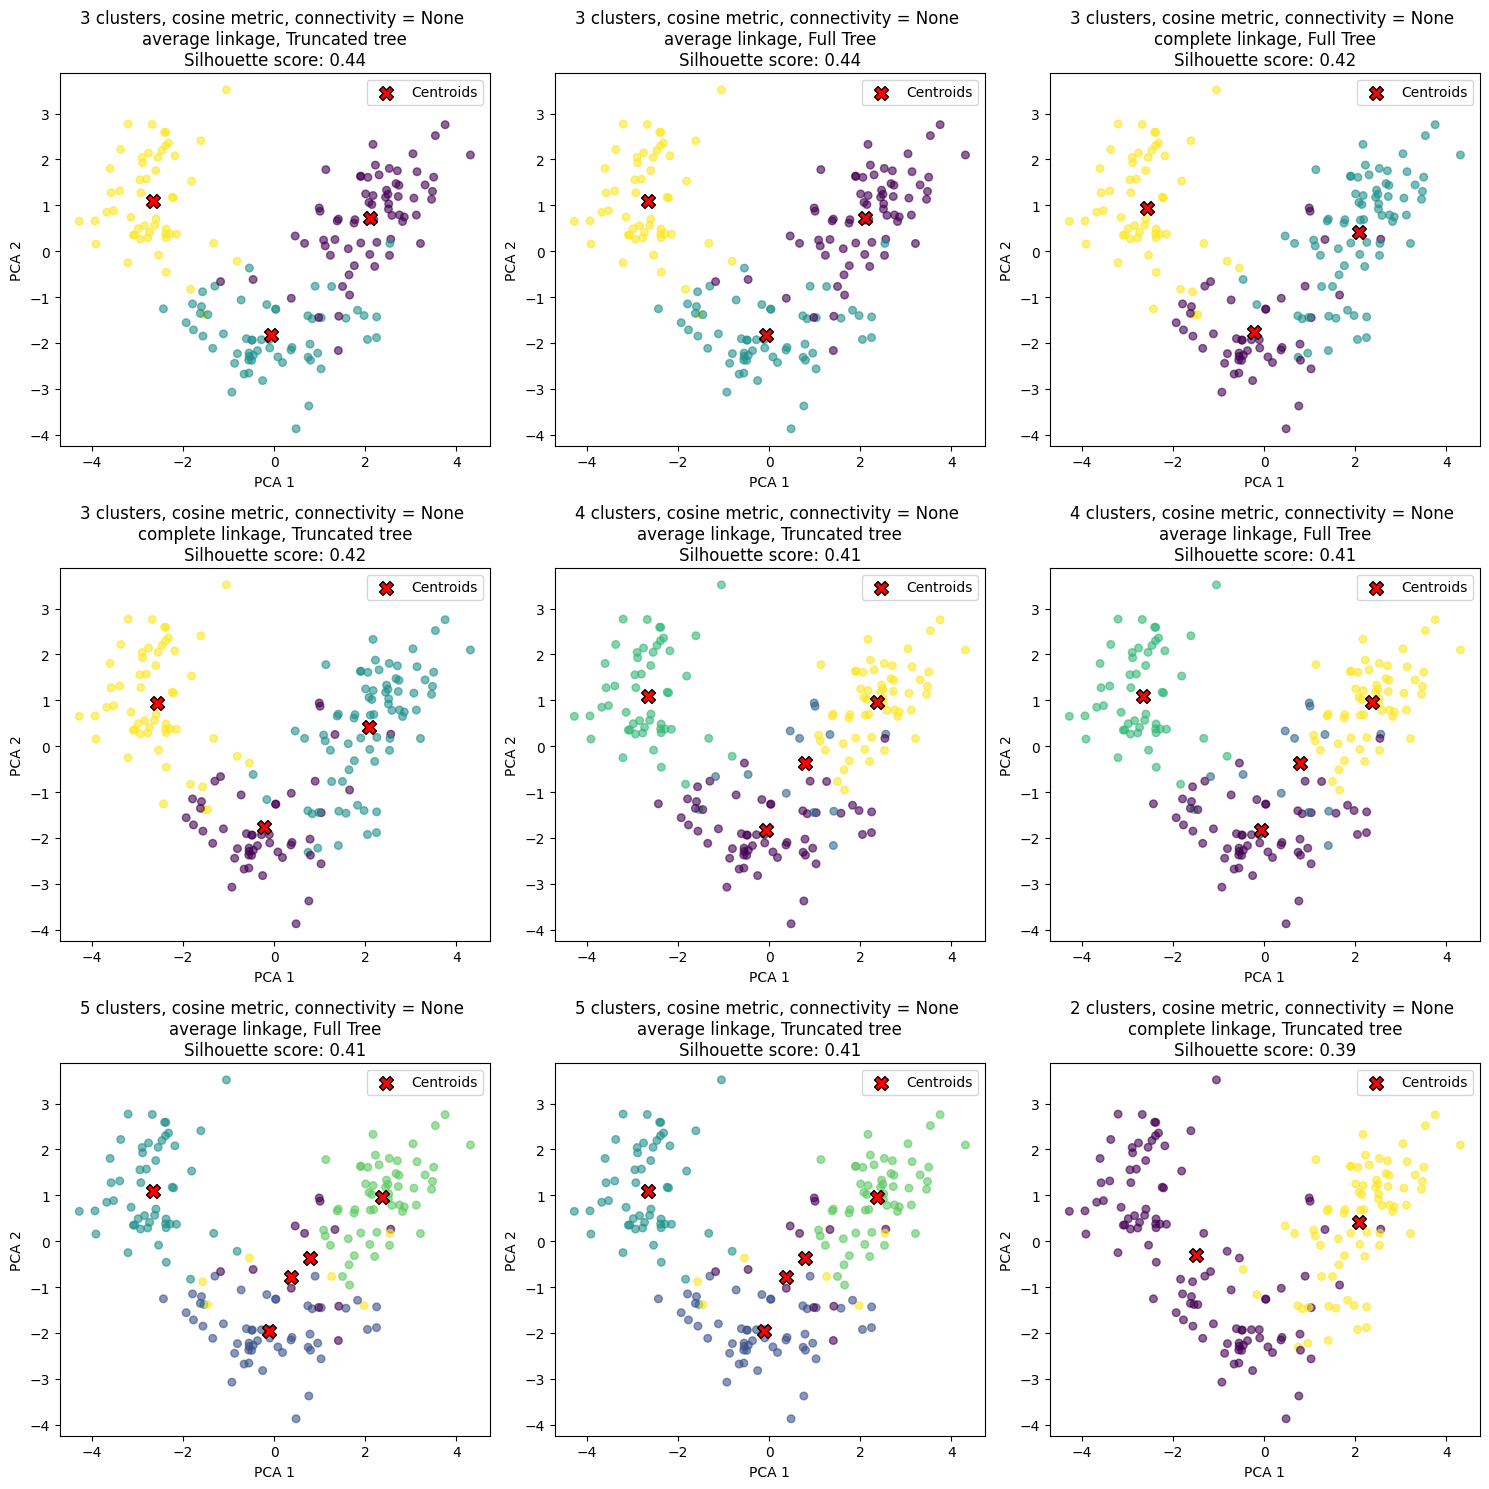

In [222]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Set up a plotting grid
num_rows = 3
num_cols = int(num_top_results / num_rows) + (num_top_results % num_rows > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# For each of the top results, perform Agglomerative Clustering and visualize
for i, param_set in enumerate(top_results_agglo.itertuples()):
    row = i // num_cols
    col = i % num_cols

    # Extract the parameters for the AgglomerativeClustering model
    model = AgglomerativeClustering(
                            n_clusters=param_set.n_clusters,
                            metric=param_set.metric,
                            linkage=param_set.linkage,
                            compute_full_tree=param_set.compute_full_tree,
                            connectivity=param_set.connectivity,
                        )

    # Fit the model and get the labels
    labels = model.fit_predict(feature_df_normalized)

    # Reduce the dimensions of the data to 2D using PCA or t-SNE
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(feature_df_normalized)

    centroids_PCA = []
    for cluster_id in range(param_set.n_clusters):
        cluster_points = reduced_data[labels == cluster_id]
        centroid = cluster_points.mean(axis=0)
        centroids_PCA.append(centroid)
    centroids_PCA = np.array(centroids_PCA)

    # Plot the clusters
    axes[row, col].scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
    axes[row, col].scatter(centroids_PCA[:, 0], centroids_PCA[:, 1], marker='X', color='red', s=100, edgecolor = 'black', label='Centroids')
    axes[row, col].set_title(
        f"{param_set.n_clusters} clusters, {param_set.metric} metric, connectivity = {param_set.connectivity_type} \n"
        f"{param_set.linkage} linkage, {'Full Tree' if param_set.compute_full_tree else 'Truncated tree'}\n"
        f"Silhouette score: {param_set.silhouette_score:.2f}"
    )
    axes[row, col].set_xlabel('PCA 1')
    axes[row, col].set_ylabel('PCA 2')
    axes[row, col].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
